In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="72UmupjryQ9D32WFetjY")
project = rf.workspace("protecting-earth").project("garbage-classification-xcqkc")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 786 kB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 178 kB 28.0 MB/s 
     |████████████████████████████████| 67 kB 6.5 MB/s 
     |████████████████████████████████| 138 kB 57.0 MB/s 
     |████████████████████████████████| 145 kB 59.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=4d1bdc433b647ee308c2265f58b7f7e2acef61193a02e8e44f8a8d617b4afcca
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to garbage-classification-1 in yolov5pytorch:: 100%|██████████| 3010/3010 [00:01<00:00, 2628.54it/s]


In [4]:
from IPython.display import Image

In [5]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.0/107.7 GB disk)


In [6]:
import os

In [7]:
# Train YOLOv5s on COCO128 for 3 epochs
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 10 --data /content/yolov5/data/coco128.yaml --weights yolov5x.pt --cache

train: weights=yolov5x.pt, cfg=, data=/content/yolov5/data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr

In [8]:
import os
os.listdir('/kaggle/working/garbage-classification-1/train/images')

FileNotFoundError: ignored

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /content/garbage-classification-1/test/images

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/garbage-classification-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
image 1/150 /content/garbage-classification-1/test/images/000000_JPG.rf.6c421d17f97533dd996e5ea9772da6f1.jpg: 640x640 (no detections), 77.1ms
image 2/150 /content/garbage-classification-1/test/images/000000_jpg.rf.8ff1647cda60de611aa332a01b179428.jpg: 640x640 1 bench, 1 bottle, 77.2ms
image 3/150 /cont

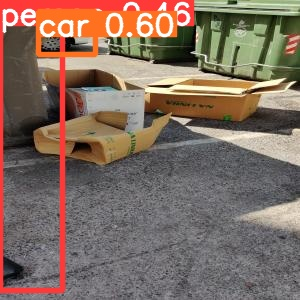

In [ ]:
Image('/content/yolov5/runs/detect/exp/000010_jpg.rf.5387709d212744777306325d5ae7c74a.jpg')

In [ ]:
! python /content/yolov5/detect.py --source 0

detect: weights=yolov5s.pt, source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 296MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

[ WARN:0@5.642] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, i

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /content/쓰레기.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/쓰레기.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-42-g5545ff3 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86705005 parameters, 0 gradients, 205.5 GFLOPs
video 1/1 (1/124) /content/쓰레기.mp4: 384x640 1 bottle, 1 laptop, 1 book, 62.1ms
video 1/1 (2/124) /content/쓰레기.mp4: 384x640 1 bottle, 1 laptop, 37.0ms
video 1/1 (3/124) /content/쓰레기.mp4: 384x640 1 bottle, 1 laptop, 1 book, 36.2ms
video 1/1 (4/124) /content/쓰레기.mp4: 384x640 1 bottle, 1 laptop, 35.9ms
video 1/1 (5/124) /content/쓰레기.m

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.35 --source /content/쓰레기.mp4